# MiniLab 2: House price prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from isc301.config import house_price_preidiction_raw_path
import isc301.model1 as poly_mod
import isc301.model2 as lin_mod

## Dataset de vente de maisons
Ce dataset contient un historique des ventes de maisons dans un comté des USA.

### Data Description
| Column header | Description |
| ---- | ---- |
| surf_hab | surface habitable totale (sans-sous sol), en pieds carrés | 
| qualite_materiau | qualité du matériau de la maison, échelle de 1 à 10 | 
| surface_sous_sol | surface totale du sous-sol en pieds-carrés | 
| qualite_globale | qualité globale de la maison, échelle de 1 à 10 | 
| n_garage_voitures | capacité du garage en nombre de voitures | 
| n_toilettes | nombre de toilettes | 
| n_cheminees | nombre de cheminées | 
| n_pieces | nombre de pièces (sans compter les salles de bain) | 
| n_cuisines | nombre de cuisines | 
| n_chambres_coucher | nombre de cuisines à coucher | 
| annee_vente | année de vente de la maison | 
| prix | prix de vente, en USD | 
| type_toit | type de toit (1 pans, 2 pans, 4 pans, mansarde, plat) | 
| type_batiment | type de bâtiment (maison individuelle, maison individuelle reconvertie en duplex, duplex, maison en millieu de rangée, maison en fin de rangée)
| qualite_cuisine | qualité de la cuisine (excellente, bonne, moyenne, médiocre) | 
| surface_jardin| surface du jardin, en pieds carrés |

In [2]:
df = pd.read_csv(house_price_preidiction_raw_path)

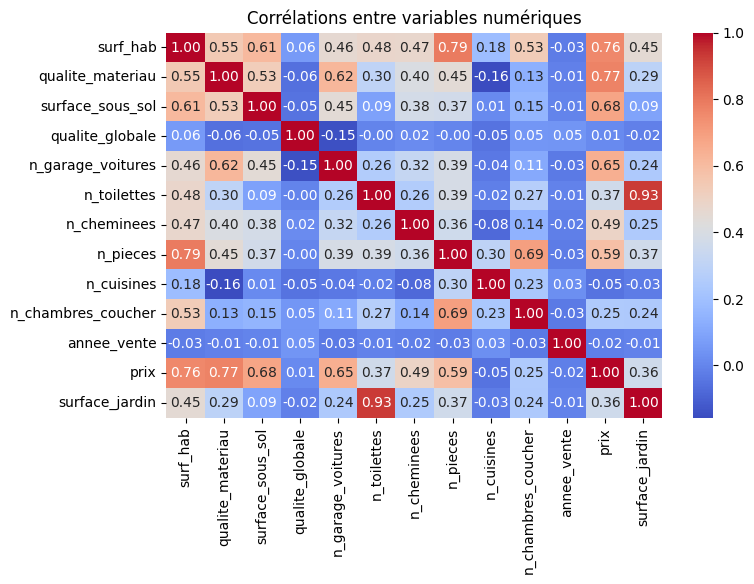

In [3]:
plt.figure(figsize=(8, 5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélations entre variables numériques")
plt.show()

Pour le prix, on a la meilleure corrélation avec `surf_hab`, `qualite_materiau`, `surface_sous_sol`, `n_garage_voitures` et `n_pieces`. 

## Séparation des données

In [4]:
X1, Y1 = poly_mod.data_preprocessing(df)
X2, Y2 = lin_mod.data_preprocessing(df)

In [5]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(
    X1, Y1, test_size=0.2, random_state=30
)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(
    X2, Y2, test_size=0.2, random_state=30
)
print(len(X1), len(X1_train), len(X1_test))
print(len(X2), len(X2_train), len(X2_test))

1364 1091 273
1364 1091 273


## Comparaison des modèles

In [6]:
def evaluate_model(mod, X_test, X_train, Y_test, Y_train):
    model = mod.model_fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae = mean_absolute_error(Y_test, y_pred)
    mae_train = mean_absolute_error(Y_train, y_pred_train)

    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    return {"MAE": mae, "MAE_train": mae_train, "RMSE": rmse, "R2": r2}

In [7]:
results = {
    "Polynomial": evaluate_model(poly_mod, X1_test, X1_train, Y1_test, Y1_train),
    "Linear": evaluate_model(lin_mod, X2_test, X2_train, Y2_test, Y2_train),
}

# Résultats sous forme de DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

NameError: name 'LassoCV' is not defined

## Résidus

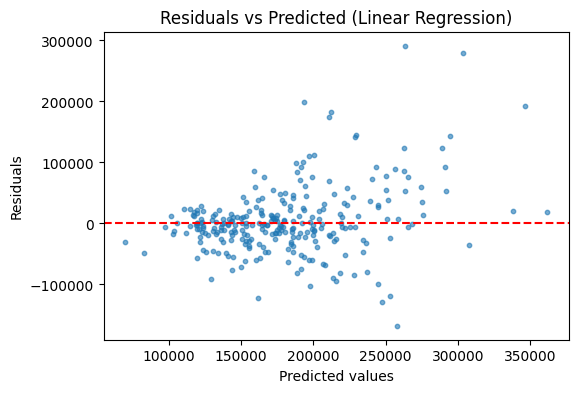

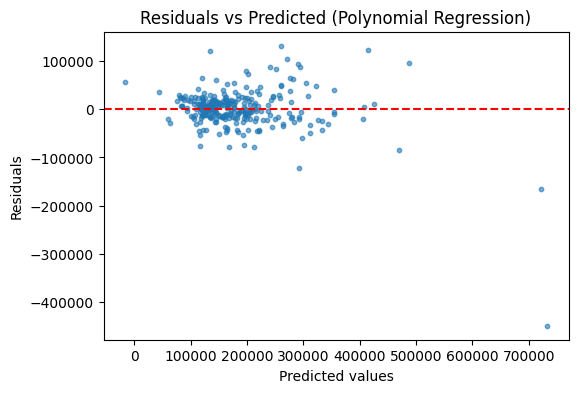

In [ ]:
def plot_residuals(y_true, y_pred, model_name="Model"):
    residuals = y_true - y_pred

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.6, s=10)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Predicted ({model_name})")
    plt.show()


model_lin = lin_mod.model_fit(X2_train, Y2_train)
y_pred_lin = model_lin.predict(X2_test)
plot_residuals(Y2_test, y_pred_lin, "Linear Regression")

model_poly = poly_mod.model_fit(X1_train, Y1_train)
y_pred_poly = model_poly.predict(X1_test)
plot_residuals(Y1_test, y_pred_poly, "Polynomial Regression")